# Clustering y dendogramas

Antes de empezar, pongamos un poco de notación para hablar en el mismo idioma

* X dataset (array de n x m) de puntos a clusterizar
* n número de datos
* m número de rasgos
* Z array de enlace del cluster con la información de las uniones
* k número de clusters

In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

(150, 2)


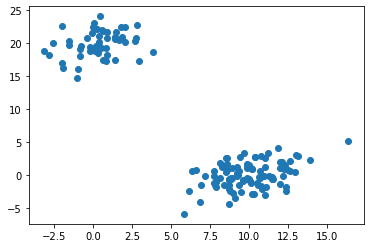

In [2]:
np.random.seed(4711) #Para tenerlo controlado y siempre salgan los mismos datos
a = np.random.multivariate_normal([10,0], [[3,1], [1,4]], size = [100,])  
#Distribución normal multivariante, es decir en varias dimensiones, primer arreglo es el eje X
b = np.random.multivariate_normal([0,20], [[3,1], [1,4]], size = [50,])
#El primer arreglo es el eje Y, los otros arreglos son las desviaciones típicas (o estándar)
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [3]:
Z = linkage(X, "ward") 
#Uso distancia Ward, usar el tipo de distancia más conveniente (manhattan, coseno, seno, etc...)
Z

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [4]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [5]:
c, coph_dist = cophenet(Z, pdist(X))
c

0.9800148387574268

* <b>98% de conservación de las distancias con respecto a los clustering que se han generado</b>

In [6]:
Z[0]

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

* El punto 52 y el punto 53 son los más cercanos con una distancia de 4.15x10⁻² y ha generado un cluster de dos elementos

In [7]:
Z[1]

array([1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00])

* El punto 14 y el punto 79 son los más cercanos con una distancia de 5.91x10⁻² y ha generado un cluster de dos elementos

In [8]:
Z[:20] #Los 20 primeros elementos

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [9]:
print(Z[152-len(X)])# Cluster 152
print(Z[158-len(X)])# Cluster 158

[33.         68.          0.07106779  2.        ]
[15.         69.          0.11428971  2.        ]


In [10]:
X[[33,62,68]]

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

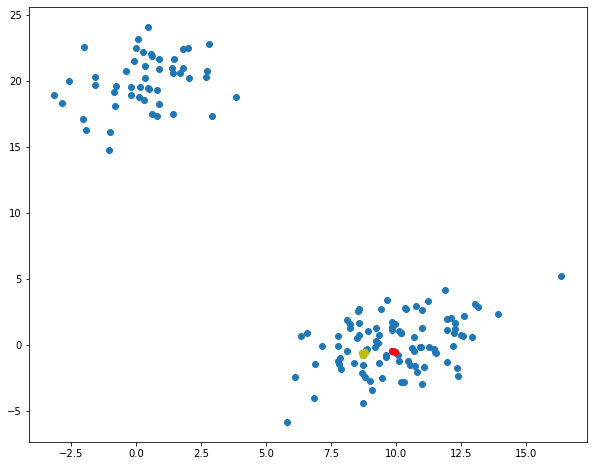

In [11]:
idx = [33,62,68]
idx2 = [15,41,69]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1])##Pintar todos los puntos
plt.scatter(X[idx,0], X[idx,1], c='r')##Destacamos en rojo los punto interesantes
plt.scatter(X[idx2,0], X[idx2,1], c='y')##Destacamos en rojo los punto interesantes
plt.show()

### Representación gráfica de un dendograma

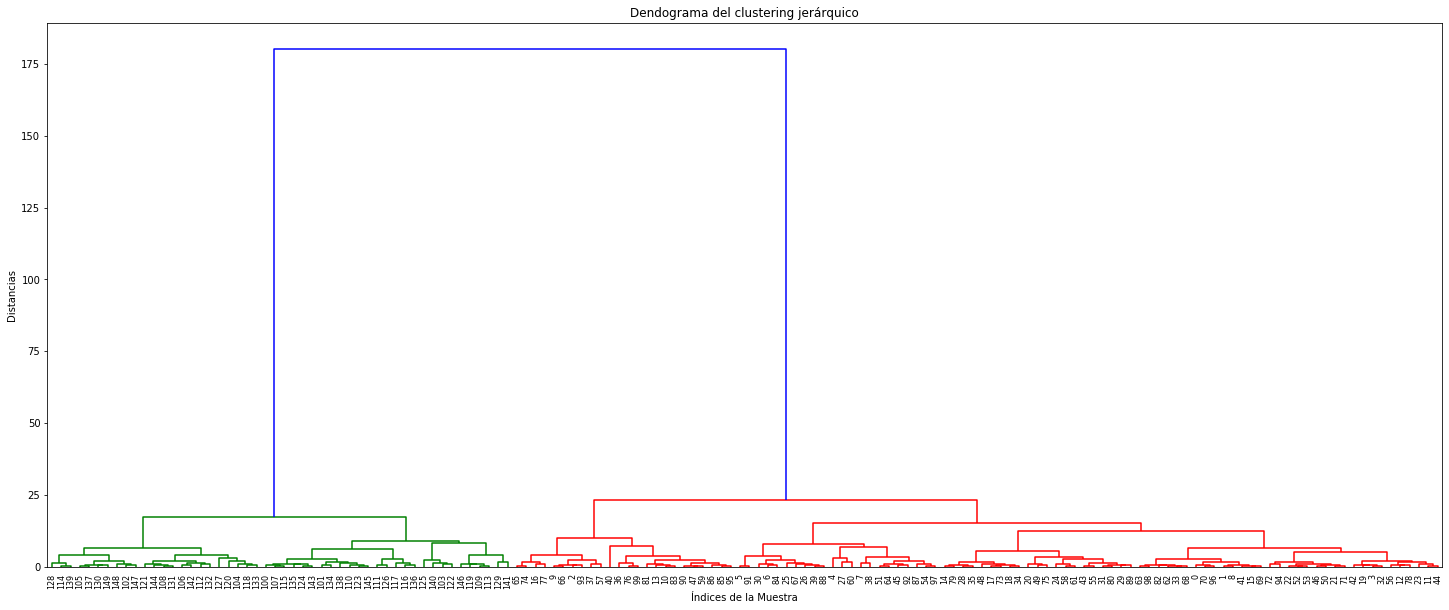

In [12]:
plt.figure(figsize=(25,10))
plt.title("Dendograma del clustering jerárquico")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation = 90., leaf_font_size=8.0, color_threshold=0.70*180)
##70% de la distancia global será la que determina el color de clusters de nuestro resultado
plt.show()

In [13]:
Z[-4:,] ##Las uniones de los últimos cuatro datos

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

## Truncar el Dendrograma

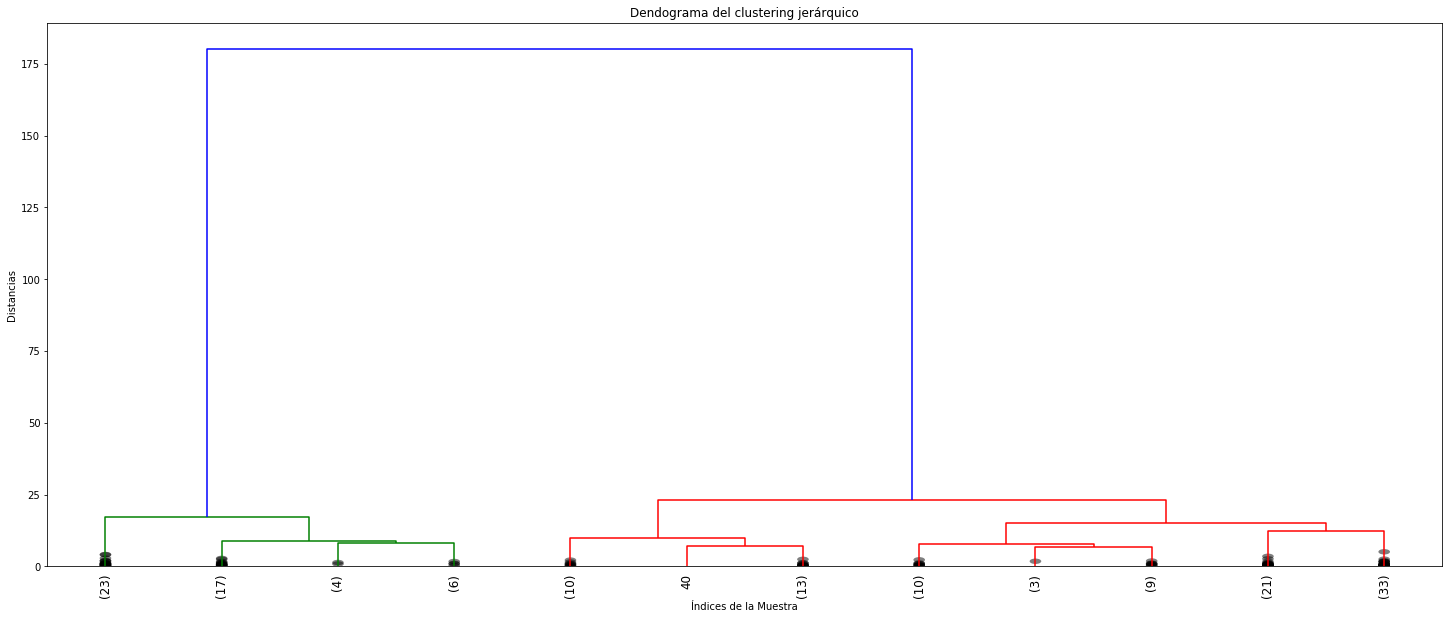

In [14]:
plt.figure(figsize=(25,10))
plt.title("Dendograma del clustering jerárquico")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation = 90., leaf_font_size=12.0, color_threshold=0.70*180, 
           truncate_mode="lastp", p=12, show_leaf_counts=True, show_contracted=True)
##70% de la distancia global será la que determina el color de clusters de nuestro resultado
## show_leaf_counts=False Muestra el número de elementos del cluter
plt.show()

## Dendrograma tuneado (Personalizado)

In [33]:
def dendrograma_tune(*args, **kwards):
    max_d=kwards.pop("max_d", None)
    if max_d and 'color_threshold' not in kwards:
        kwards['color_threshold'] = max_d
    annotate_above = kwards.pop('annotate_above', 0)
    
    ddata = dendrogram(*args, **kwards)
    
    #print(ddata)
    
    if not kwards.get('no_plot', False):
        plt.title("Clustering con Dendrograma truncado")
        plt.xlabel("Índice del Dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for index, distance, color in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x=0.4 * sum(index[1:3])
            y=distance[1]
            if y>annotate_above:
                plt.plot(x,y, 'o', c=color)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                            textcoords="offset points", va="top", ha="center")
    if max_d:
        plt.axhline(y=max_d, c='k')
    return ddata

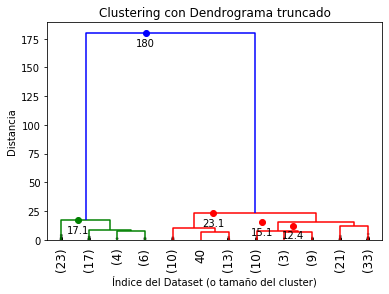

In [34]:
dendrograma_tune(Z,truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12.0, 
                 show_contracted=True, annotate_above=10)
plt.show()

### Corte automático del dendrograma
inconsistency_i = (h_i-avg(h_j))/std(h_j)

In [35]:
from scipy.cluster.hierarchy import inconsistent

In [36]:
#Esta no es la mejor técnica para clusterizar
depth = 5 #profundidad
incons = inconsistent(Z, depth)
incons[-10:]

array([[ 1.80874989,  2.17061644, 10.        ,  2.44276733],
       [ 2.31731998,  2.19649179, 16.        ,  2.52742372],
       [ 2.24511599,  2.44225327,  9.        ,  2.37659088],
       [ 2.30462321,  2.44191287, 21.        ,  2.6387508 ],
       [ 2.20673283,  2.68378067, 17.        ,  2.84581581],
       [ 1.95309037,  2.58100378, 29.        ,  4.05821033],
       [ 3.46173275,  3.53735716, 28.        ,  3.29443647],
       [ 3.15857131,  3.54836284, 28.        ,  3.93327935],
       [ 4.90210137,  5.10301603, 28.        ,  3.57041559],
       [12.12200256, 32.15467931, 30.        ,  5.22936105]])

### Método del codo

[180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]


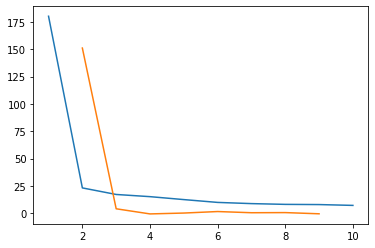

El número óptimo de cluster es 2


In [37]:
last = Z[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2) #últimas restas de dos en dos
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() + 2
print("El número óptimo de cluster es %s"  %str(k))

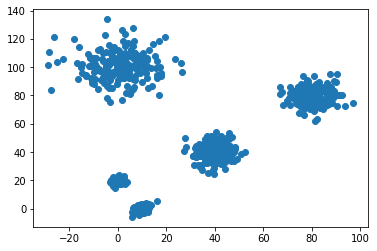

In [38]:
c = np.random.multivariate_normal([40,40], [[20,1], [1,30]], size=[200,])
d = np.random.multivariate_normal([80,80], [[30,1], [1,30]], size=[200,])
e = np.random.multivariate_normal([0,100], [[100,1], [1,100]], size=[200,])
X2 = np.concatenate((X,c,d,e),)
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [39]:
Z2 = linkage(X2, "ward")

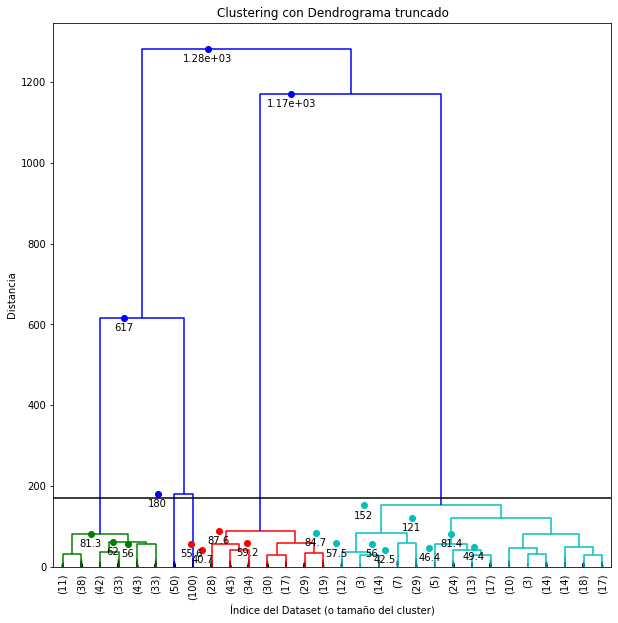

In [42]:
plt.figure(figsize=(10,10))
dendrograma_tune(
    Z2,
    truncate_mode="lastp",
    p=30,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    annotate_above=40,
    max_d=170
)
plt.show()

[1282.46706354 1170.98586166  616.54762239  180.27043021  151.60666456
  121.12826348   87.63025871   84.6531831    81.40781749   81.26914533]


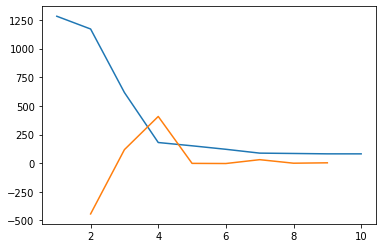

El número óptimo de cluster es 4


In [44]:
last = Z2[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2) #últimas restas de dos en dos
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() + 2
print("El número óptimo de cluster es %s"  %str(k))

In [45]:
print  (inconsistent(Z2, 5) [-10:])
#imprimiendo el valor de inconsitencia del 5 nivel de los últimos 10 valores

[[ 17.77607317  18.87474236  30.           3.36391729]
 [ 15.23571589  17.63042243  29.           3.75329076]
 [ 17.5423546   18.98041797  25.           3.53579297]
 [ 19.71893206  18.70559634  31.           3.63053524]
 [ 25.39008081  26.21789135  28.           3.6516355 ]
 [ 36.46474732  34.13171399  30.           3.3734584 ]
 [ 12.12200256  32.15467931  30.           5.22936105]
 [ 43.46845429 111.71230335  31.           5.12995571]
 [ 80.34950945 205.0127263   31.           5.31984707]
 [147.0446429  308.44162511  31.           3.68115821]]


## Recuperar los clusters y sus elementos

In [46]:
from scipy.cluster.hierarchy import fcluster

In [54]:
max_distance=25 #Deacuerdo a la distancia del dendrograma
clusters = fcluster(Z, max_distance, criterion="distance")
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [55]:
k=2 #Deacuerdo a el número de clusters del dendrograma
clusters=fcluster(Z, k, criterion="maxclust")
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [56]:
fcluster(Z, 8, depth=10) 
#Separando los clusters que estén a 8 puntos de ditancia con una profundidad de 10 elementos

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

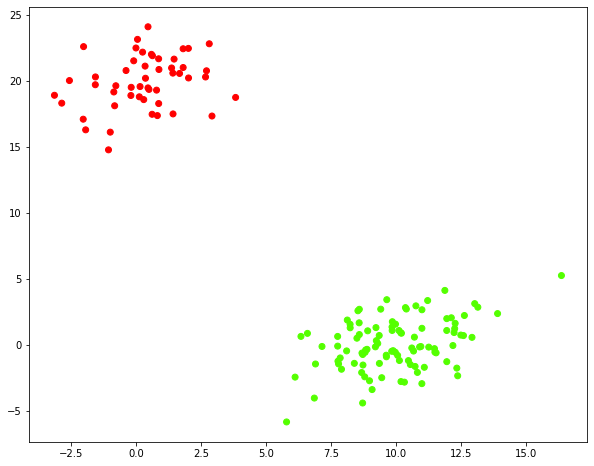

In [57]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap="prism")
plt.show()

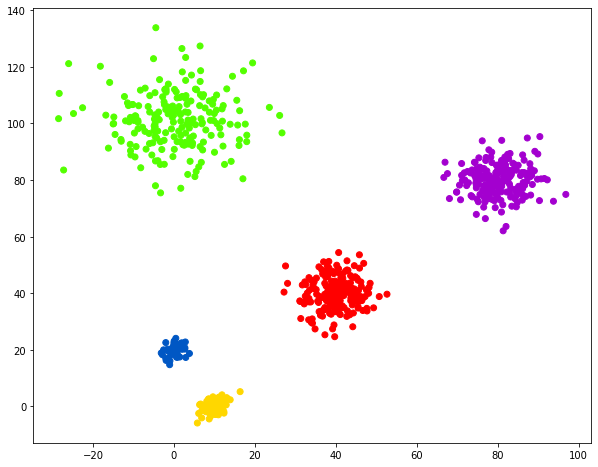

In [64]:
max_distance=170 #Deacuerdo a la distancia del dendrograma
clusters = fcluster(Z2, max_distance, criterion="distance")
clusters

plt.figure(figsize=(10,8))
plt.scatter(X2[:,0], X2[:,1], c=clusters, cmap="prism")
plt.show()